In [1]:
import math
import numpy as np
import pandas as pd
import pingouin as pg
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

C:\Users\Jay\anaconda3\envs\fyp\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\Jay\anaconda3\envs\fyp\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
file = pd.read_csv('FYP_aggregate_data.csv')

In [3]:
file.columns

Index(['Year', 'Confucius Institutes in Oceania',
       'Confucius Institutes in Australia', 'Confucius Institutes in NZ',
       'Total # of Chinese language media companies in Australia',
       '# of Chinese language media companies in Australia directly involved with UF',
       '# of Chinese language media companies in Australia attended UF forum',
       'Number of CSSAs in Australian universities',
       'Number of state level CSSAs in Australia',
       'Number of CPPRCs in Oceania', 'Number of CPPRCs in Australia',
       'Number of CPPRCs in NZ', 'Total Chinese exports',
       'Total Chinese imports', 'Australian export dependence on China',
       'NZ export dependence on China',
       'Number of Australian trade goods with >0.7 dependence on China',
       'Number of Australian trade goods with >0.5 dependence on China',
       'Number of Australian trade goods with >0.3 dependence on China',
       'Number of NZ trade goods with >0.7 dependence on China',
       'Numbe

# # Function to draw semi-partial correlation matrix # #

In [4]:
# draw semi-partial correlation matrix
def draw_spcorr_matrix(file, X, Y, rows_to_trim=[], x_covar=[], y_covar=[], sigmoid_scale=False, return_all_stats=False):
    select_pcorr_matrix = []
    detailed_pcorr_matrix = {}
    non_control_vars = []
    # drop rows
    filtered_file = file.drop(columns=rows_to_trim)

    for x in X:
        non_control_vars.append(x)
        select_pcorr_array = []
        detailed_pcorr_array = {}
        for y in Y:
            if x == y:
                select_pcorr_array.append(1)
            else:
                select_pcorr = pg.partial_corr(filtered_file, x=x, y=y, x_covar=x_covar,y_covar=y_covar)
                r = select_pcorr['r']['pearson']
                select_pcorr_list = select_pcorr.to_numpy().tolist()[0]
                if return_all_stats:
                    detailed_pcorr_array[y] = select_pcorr_list
                else:
                    detailed_pcorr_array[y] = (select_pcorr_list[1], select_pcorr_list[5])
                select_pcorr_array.append(r)
        select_pcorr_matrix.append(select_pcorr_array)
        detailed_pcorr_matrix[x] = detailed_pcorr_array
    
    if sigmoid_scale:
        apply_sigmoid = np.vectorize(lambda x: 2*(1/(1+math.exp(-x*6))-0.5))
        select_pcorr_matrix = apply_sigmoid(select_pcorr_matrix)
    max_corr, min_corr = np.amax(select_pcorr_matrix), np.amin(select_pcorr_matrix)
    print(f'max correlation: {max_corr}, min correlation: {min_corr}')

    spcorr_matrix_draw_graph(X,Y, select_pcorr_matrix, verbose=True, rows_to_trim=rows_to_trim)
    
    # save matrix to csv
#     df = pd.DataFrame(select_pcorr_matrix, index=non_control_vars, columns=non_control_vars).to_csv(f'DF_controlled_by_{repr(control_vars)}.csv')
    return detailed_pcorr_matrix
    
def spcorr_matrix_draw_graph(corr_rows, corr_columns, correlation_matrix, verbose, rows_to_trim):
    fig = plt.figure(figsize=(10,10))
    ax1 = plt.subplot(111)
    rows = []
    columns = []
    i=-1
    for x in corr_rows:
        i+=1
        if i in rows_to_trim:
            continue
        rows.append(f'{i}: {x}')
    for x in corr_columns:
        i+=1
        if i in rows_to_trim:
            continue
        columns.append(f'{i}: {x}')
    
    print(f'row: {rows}, col: {columns}')
    
    len_row, len_col = len(rows), len(columns)

    # draw axes
    cax = ax1.matshow(correlation_matrix)
    ax1.set_yticks(range(len_row), minor=False)
    ax1.set_yticks(range(len_row), minor=True)
    if verbose:
        ax1.set_yticklabels(rows, minor=False, fontsize=14)
        ax1.set_yticklabels(rows, minor=True, fontsize=14)
    else:
        ax1.set_yticklabels(range(len_row), minor=False, fontsize=14)
    ax1.set_xticks(range(len_col), minor=False)
    ax1.set_xticks(range(len_col), minor=True)
    if verbose:
        ax1.set_xticklabels(columns, rotation='vertical', minor=False, fontsize=14)
        ax1.set_xticklabels(columns, minor=True, fontsize=14)
        plt.gca().xaxis.tick_bottom()
    else:
        ax1.set_xticklabels(range(len_row, len_row+len_col), minor=False)
    plt.setp(ax1.xaxis.get_minorticklabels(), rotation=90)
    fig.colorbar(cax)

# # Drawing the sp-corr matrix # #

max correlation: 0.6714393935137555, min correlation: -0.682646041991785
row: ['0: Confucius Institutes in Oceania', '1: Confucius Institutes in Australia', '2: Confucius Institutes in NZ', '3: Total # of Chinese language media companies in Australia', '4: # of Chinese language media companies in Australia directly involved with UF', '5: # of Chinese language media companies in Australia attended UF forum', '6: Number of CSSAs in Australian universities', '7: Number of state level CSSAs in Australia', '8: Number of CPPRCs in Oceania', '9: Number of CPPRCs in Australia', '10: Number of CPPRCs in NZ'], col: ['11: Australian export dependence on China', '12: NZ export dependence on China', '13: Number of Australian trade goods with >0.7 dependence on China', '14: Number of Australian trade goods with >0.5 dependence on China', '15: Number of Australian trade goods with >0.3 dependence on China', '16: Number of NZ trade goods with >0.7 dependence on China', '17: Number of NZ trade goods wi

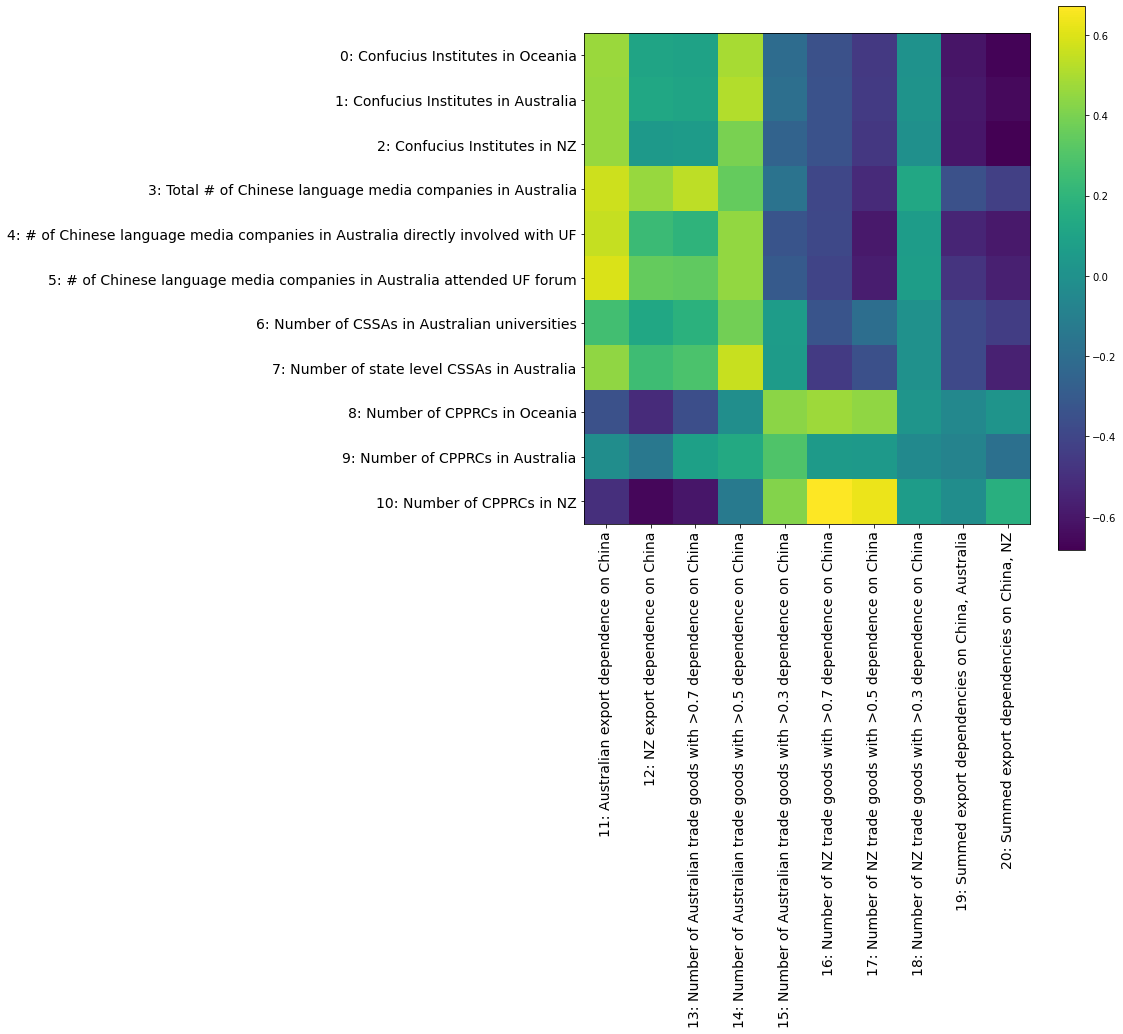

In [5]:
# X are dependent variables, Y are independent variables (IV vs DV doesn't actually matter, this is for your information)
X=['Confucius Institutes in Oceania',
   'Confucius Institutes in Australia', 'Confucius Institutes in NZ',
   'Total # of Chinese language media companies in Australia',
   '# of Chinese language media companies in Australia directly involved with UF',
   '# of Chinese language media companies in Australia attended UF forum',
   'Number of CSSAs in Australian universities',
   'Number of state level CSSAs in Australia',
   'Number of CPPRCs in Oceania', 'Number of CPPRCs in Australia',
   'Number of CPPRCs in NZ']
Y=['Australian export dependence on China',
   'NZ export dependence on China',
   'Number of Australian trade goods with >0.7 dependence on China',
   'Number of Australian trade goods with >0.5 dependence on China',
   'Number of Australian trade goods with >0.3 dependence on China',
   'Number of NZ trade goods with >0.7 dependence on China',
   'Number of NZ trade goods with >0.5 dependence on China',
   'Number of NZ trade goods with >0.3 dependence on China',
   'Summed export dependencies on China, Australia',
   'Summed export dependencies on China, NZ'
  ]
# control variables for X and for Y
# if x_covar == [] and y_covar == [] : compute correlations
# elif x_covar == y_covar : compute partial correlations
# else : compute semi-partial correlations
x_covar=['Year']
y_covar=['Total Chinese imports']

# draw the matrix
stats = draw_spcorr_matrix(file, X=X,Y=Y,x_covar=x_covar,y_covar=y_covar, return_all_stats=False)
# full_stats = draw_spcorr_matrix(file, X=X,Y=Y,x_covar=x_covar,y_covar=y_covar, return_all_stats=True)

max correlation: 0.9358055403761928, min correlation: -0.7648774596298
row: ['0: Confucius Institutes in Oceania', '1: Confucius Institutes in Australia', '2: Confucius Institutes in NZ', '3: Total # of Chinese language media companies in Australia', '4: # of Chinese language media companies in Australia directly involved with UF', '5: # of Chinese language media companies in Australia attended UF forum', '6: Number of CSSAs in Australian universities', '7: Number of state level CSSAs in Australia', '8: Number of CPPRCs in Oceania', '9: Number of CPPRCs in Australia', '10: Chinese born immigrants to Australia'], col: ['11: Cumulative Chinese investment in Australia', '12: Cumulative Chinese investment in NZ']


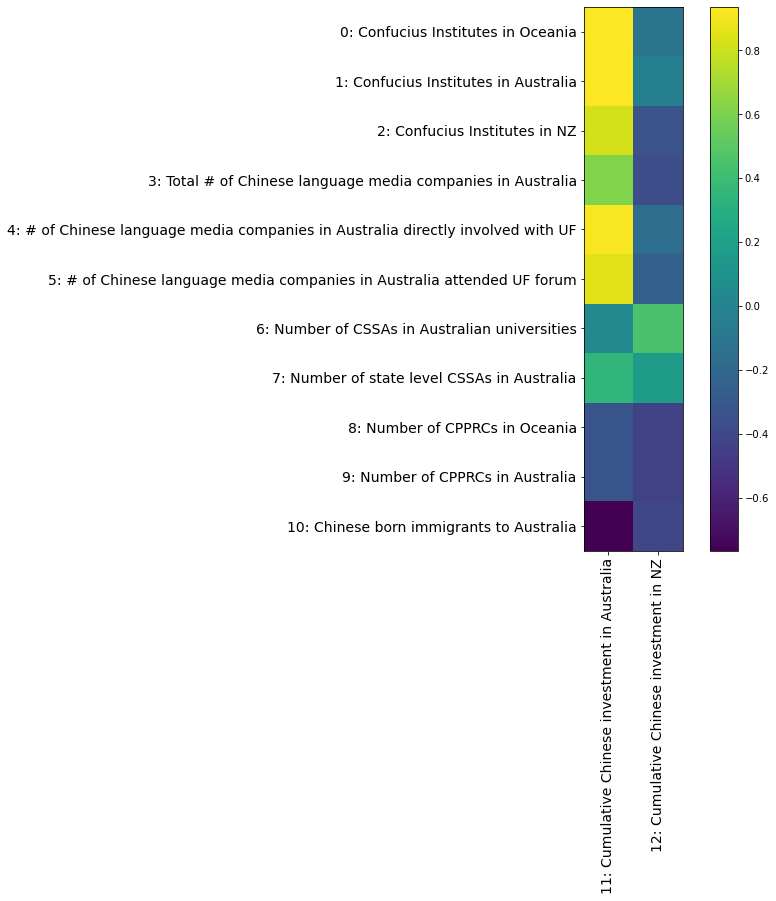

In [6]:
# parameters
X=[
    'Confucius Institutes in Oceania',
   'Confucius Institutes in Australia', 'Confucius Institutes in NZ',
   'Total # of Chinese language media companies in Australia',
   '# of Chinese language media companies in Australia directly involved with UF',
   '# of Chinese language media companies in Australia attended UF forum',
   'Number of CSSAs in Australian universities',
   'Number of state level CSSAs in Australia',
   'Number of CPPRCs in Oceania', 
   'Number of CPPRCs in Australia',
   'Chinese born immigrants to Australia'
  ]
Y=[
   'Cumulative Chinese investment in Australia',
   'Cumulative Chinese investment in NZ',
  ]
x_covar=[
    'Year',
#     'Total Chinese imports',
#     'Cumulative Chinese investment, global'
#     'Chinese born immigrants to Australia'
        ]
y_covar=[
#     'Total Chinese imports',
#     'Year',
    'Cumulative Chinese investment, global'
        ]

# draw the matrix
stats = draw_spcorr_matrix(file, X=X,Y=Y,x_covar=x_covar,y_covar=y_covar, return_all_stats=False)
# full_stats = draw_spcorr_matrix(file, X=X,Y=Y,x_covar=x_covar,y_covar=y_covar, return_all_stats=True)

In [7]:
# show expected correlation coefficient (first) and p-value of rejecting null hypothesis (NH = no correlation) (second)
pd.DataFrame.from_dict(stats)

,Confucius Institutes in Oceania,Confucius Institutes in Australia,Confucius Institutes in NZ,Total # of Chinese language media companies in Australia,# of Chinese language media companies in Australia directly involved with UF,# of Chinese language media companies in Australia attended UF forum,Number of CSSAs in Australian universities,Number of state level CSSAs in Australia,Number of CPPRCs in Oceania,Number of CPPRCs in Australia,Chinese born immigrants to Australia
Cumulative Chinese investment in Australia,"(0.9328784276861983, 1.3765794859699745e-07)","(0.9358055403761928, 1.0154921188749406e-07)","(0.8228810036797021, 9.052414188386219e-05)","(0.6146975968916322, 0.011280883054364494)","(0.9165140300361835, 6.064906001360653e-07)","(0.8578463301311519, 2.141846608018877e-05)","(0.03639510587986178, 0.8935492834812044)","(0.35644088669867385, 0.17537790843929954)","(-0.32134870277033223, 0.22488389229999378)","(-0.32134870277033223, 0.22488389229999378)","(-0.7648774596298, 0.0008939946310717376)"
Cumulative Chinese investment in NZ,"(-0.11282128153789475, 0.6774023269820104)","(-0.027726862139277136, 0.9188126057848264)","(-0.33161809386379926, 0.20956928861472593)","(-0.36344235994799057, 0.16644711809624727)","(-0.156312684656571, 0.5631935931214931)","(-0.24174063634821286, 0.3670528059673698)","(0.4502310170386256, 0.08012157838580065)","(0.1780553859205628, 0.5094132064005638)","(-0.42710917621966715, 0.09893868440606587)","(-0.42710917621966715, 0.09893868440606587)","(-0.4032334122763173, 0.13612713019791053)"


In [33]:
# Iff return_all_stats was true in previous calculation (and drawing) of spcorr matrix
# display those detailed stats for a particular cell

# WARNING: only works if return_all_stats was set to true in previous calculation
# If you want to use this, you can uncomment the last line of code boxes 5 or 6,
# which returns the full stats instead of simple stats

pd.DataFrame.transpose(
    pd.DataFrame(
        full_stats['Confucius Institutes in Oceania']['Cumulative Chinese investment in Australia'],
        index=['n','r','CI95%','r2','adj_r2','p-val','BF10','power']
    )
)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
0,16,0.932878,"[0.81, 0.98]",0.870262,0.850302,1.37658e-07,8.462e+04,0.999987


In [8]:
# check p-values against p-tests in the p_tests array
# save some csv files - p test results and p values in separate csv files

# WARNING: only works when return_all_stats was set to false in previous calculation

def pass_p_test(stats, p_tests, save_p_values=False):
    test_results = {}
    for x, row in stats.items():
        tr = {}
        for y, cell in row.items():
            assert(len(cell) == 2)
            (corr, p) = cell
            if save_p_values:
                tr[y]=p
            else:
                for p_test in sorted(p_tests, reverse=True):
                    if p < p_test:
                        tr[y]=p_test
        test_results[x]=tr
    return test_results

# pd.DataFrame.from_dict(stats).to_csv('file1_pcorr_stats2.csv')

p_tests=[0.01,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00001,0.000001]
test_results = pass_p_test(stats, p_tests)
# pd.DataFrame.from_dict(test_results).to_csv(f'spcorr_stats_p_test_result.csv')

test_results_raw_p = pass_p_test(stats, p_tests, save_p_values=True)
# pd.DataFrame.from_dict(test_results_raw_p).to_csv(f'spcorr_stats_p_values.csv')

In [9]:
# put raw stats to csv file in an Excel friendly format (less precision)

# WARNING: only works when return_all_stats was set to false in previous calculation

def put_to_excel(stats):
    test_results = {}
    round_to_n = lambda x, n: x if x == 0 else round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1))
    for x, row in stats.items():
        tr = {}
        for y, cell in row.items():
            assert(len(cell) == 2)
            (corr, p) = cell
            tr[y] = (round_to_n(corr,3), round_to_n(p,3))
        test_results[x]=tr
    return test_results

excel_results = put_to_excel(stats)
pd.DataFrame.from_dict(excel_results).to_csv('excel.csv')